In [90]:
#!pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
  
# data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 
  
# metadata 
print(phiusiil_phishing_url_website.metadata) 
  
# variable information 
print(phiusiil_phishing_url_website.variables) 


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

## Feature Selection

### Feature Selection by Variance Threshold

In [2]:
X.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


In [3]:
X.dtypes

URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineL

In [4]:
y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [6]:
import pandas as pd

data = pd.concat([y, X], axis=1)
data.head()

,label,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,1,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,1,0,0,1,34,20,28,119,0,124
1,1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,0,1,50,9,8,39,0,217
2,1,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,0,1,10,2,7,42,2,5
3,1,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,0,1,1,1,3,27,15,22,1,31
4,1,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,1,0,1,244,15,34,72,1,85


In [7]:
print(f"Initial shape of the data: {data.shape}")

Initial shape of the data: (235795, 55)


In [8]:
X.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000


In [9]:
import pandas as pd

# Assuming X is your DataFrame
categorical_features = X.select_dtypes(include=['object', 'category']).columns
print(categorical_features)

Index(['URL', 'Domain', 'TLD', 'Title'], dtype='object')


In [15]:
X_categorical = X.select_dtypes(include=['object', 'category'])
X_categorical.head()

,URL,Domain,TLD,Title
0,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina


In [11]:
# data['TLD'] = data['TLD'].astype('object')

# data = pd.get_dummies(data)

# MemoryError: Unable to allocate 51.7 GiB for an array with shape (235795, 235370) and data type bool

In [12]:
numeric_features = X.select_dtypes(include=['number']).columns
print(numeric_features)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')


In [16]:
X_numeric = X.select_dtypes(include=['number'])
X_numeric.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,1,0,0,1,34,20,28,119,0,124
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,0,1,50,9,8,39,0,217
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,0,1,10,2,7,42,2,5
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,0,1,1,1,3,27,15,22,1,31
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,1,0,1,244,15,34,72,1,85


# Feature Selection by Variance Threshold

In [17]:
print(X_numeric.var())

URLLength                     1.706859e+03
DomainLength                  8.373702e+01
IsDomainIP                    2.698431e-03
URLSimilarityIndex            8.396117e+02
CharContinuationRate          4.692961e-02
TLDLegitimateProb             6.331677e-02
URLCharProb                   1.120862e-04
TLDLength                     3.596865e-01
NoOfSubDomain                 3.611641e-01
HasObfuscation                2.052649e-03
NoOfObfuscatedChar            3.520311e+00
ObfuscationRatio              1.457109e-05
NoOfLettersInURL              8.462473e+02
LetterRatioInURL              1.520651e-02
NoOfDegitsInURL               1.412935e+02
DegitRatioInURL               5.026428e-03
NoOfEqualsInURL               8.736718e-01
NoOfQMarkInURL                3.744434e-02
NoOfAmpersandInURL            6.996445e-01
NoOfOtherSpecialCharsInURL    1.244399e+01
SpacialCharRatioInURL         1.049305e-03
IsHTTPS                       1.701240e-01
LineOfCode                    1.169606e+07
LargestLine

In [18]:
from sklearn.feature_selection import VarianceThreshold

# applying variance threshold
thresholder = VarianceThreshold(threshold=0.1)
X_high_variance = thresholder.fit_transform(X_numeric)

# Convert the numpy array back to a DataFrame
# Retrieve the retained feature indices
features = thresholder.get_support(indices=True)
X_high_variance_df = pd.DataFrame(X_high_variance, columns=[X_numeric.columns[i] for i in features])

print("Shape of data after Variance Threshold:", X_high_variance_df.shape)
X_high_variance_df.head()

Shape of data after Variance Threshold: (235795, 36)


,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfAmpersandInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31.0,24.0,100.0,3.0,1.0,0.0,18.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,34.0,20.0,28.0,119.0,0.0,124.0
1,23.0,16.0,100.0,2.0,1.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,9.0,8.0,39.0,0.0,217.0
2,29.0,22.0,100.0,2.0,2.0,0.0,15.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,10.0,2.0,7.0,42.0,2.0,5.0
3,26.0,19.0,100.0,3.0,1.0,0.0,13.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,3.0,27.0,15.0,22.0,1.0,31.0
4,33.0,26.0,100.0,3.0,1.0,0.0,20.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,244.0,15.0,34.0,72.0,1.0,85.0


In [19]:
X_high_variance_df.columns

Index(['URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength',
       'NoOfSubDomain', 'NoOfObfuscatedChar', 'NoOfLettersInURL',
       'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')

# Feature Selection by Correlation Between Input Features

In [20]:
# Calculate the correlation matrix
corr_matrix = X_numeric.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                            URLLength  DomainLength  IsDomainIP  \
URLLength                    1.000000      0.243091    0.277272   
DomainLength                 0.243091      1.000000   -0.041398   
IsDomainIP                   0.277272     -0.041398    1.000000   
URLSimilarityIndex          -0.421104     -0.420694   -0.121439   
CharContinuationRate        -0.241104     -0.577425   -0.101307   
TLDLegitimateProb           -0.016656      0.027209   -0.053220   
URLCharProb                 -0.245215     -0.178104   -0.111769   
TLDLength                    0.033339      0.152669   -0.011125   
NoOfSubDomain                0.071058      0.399157    0.084619   
HasObfuscation               0.161980      0.041643    0.001239   
NoOfObfuscatedChar           0.459094      0.011304    0.000354   
ObfuscationRatio             0.127472      0.021627    0.000977   
NoOfLettersInURL             0.956047      0.277602    0.244300   
LetterRatioInURL             0.312632     

Pairs with high correlation (|correlation| > 0.85):
URLLength and NoOfLettersInURL: 0.96
DomainTitleMatchScore and URLTitleMatchScore: 0.96


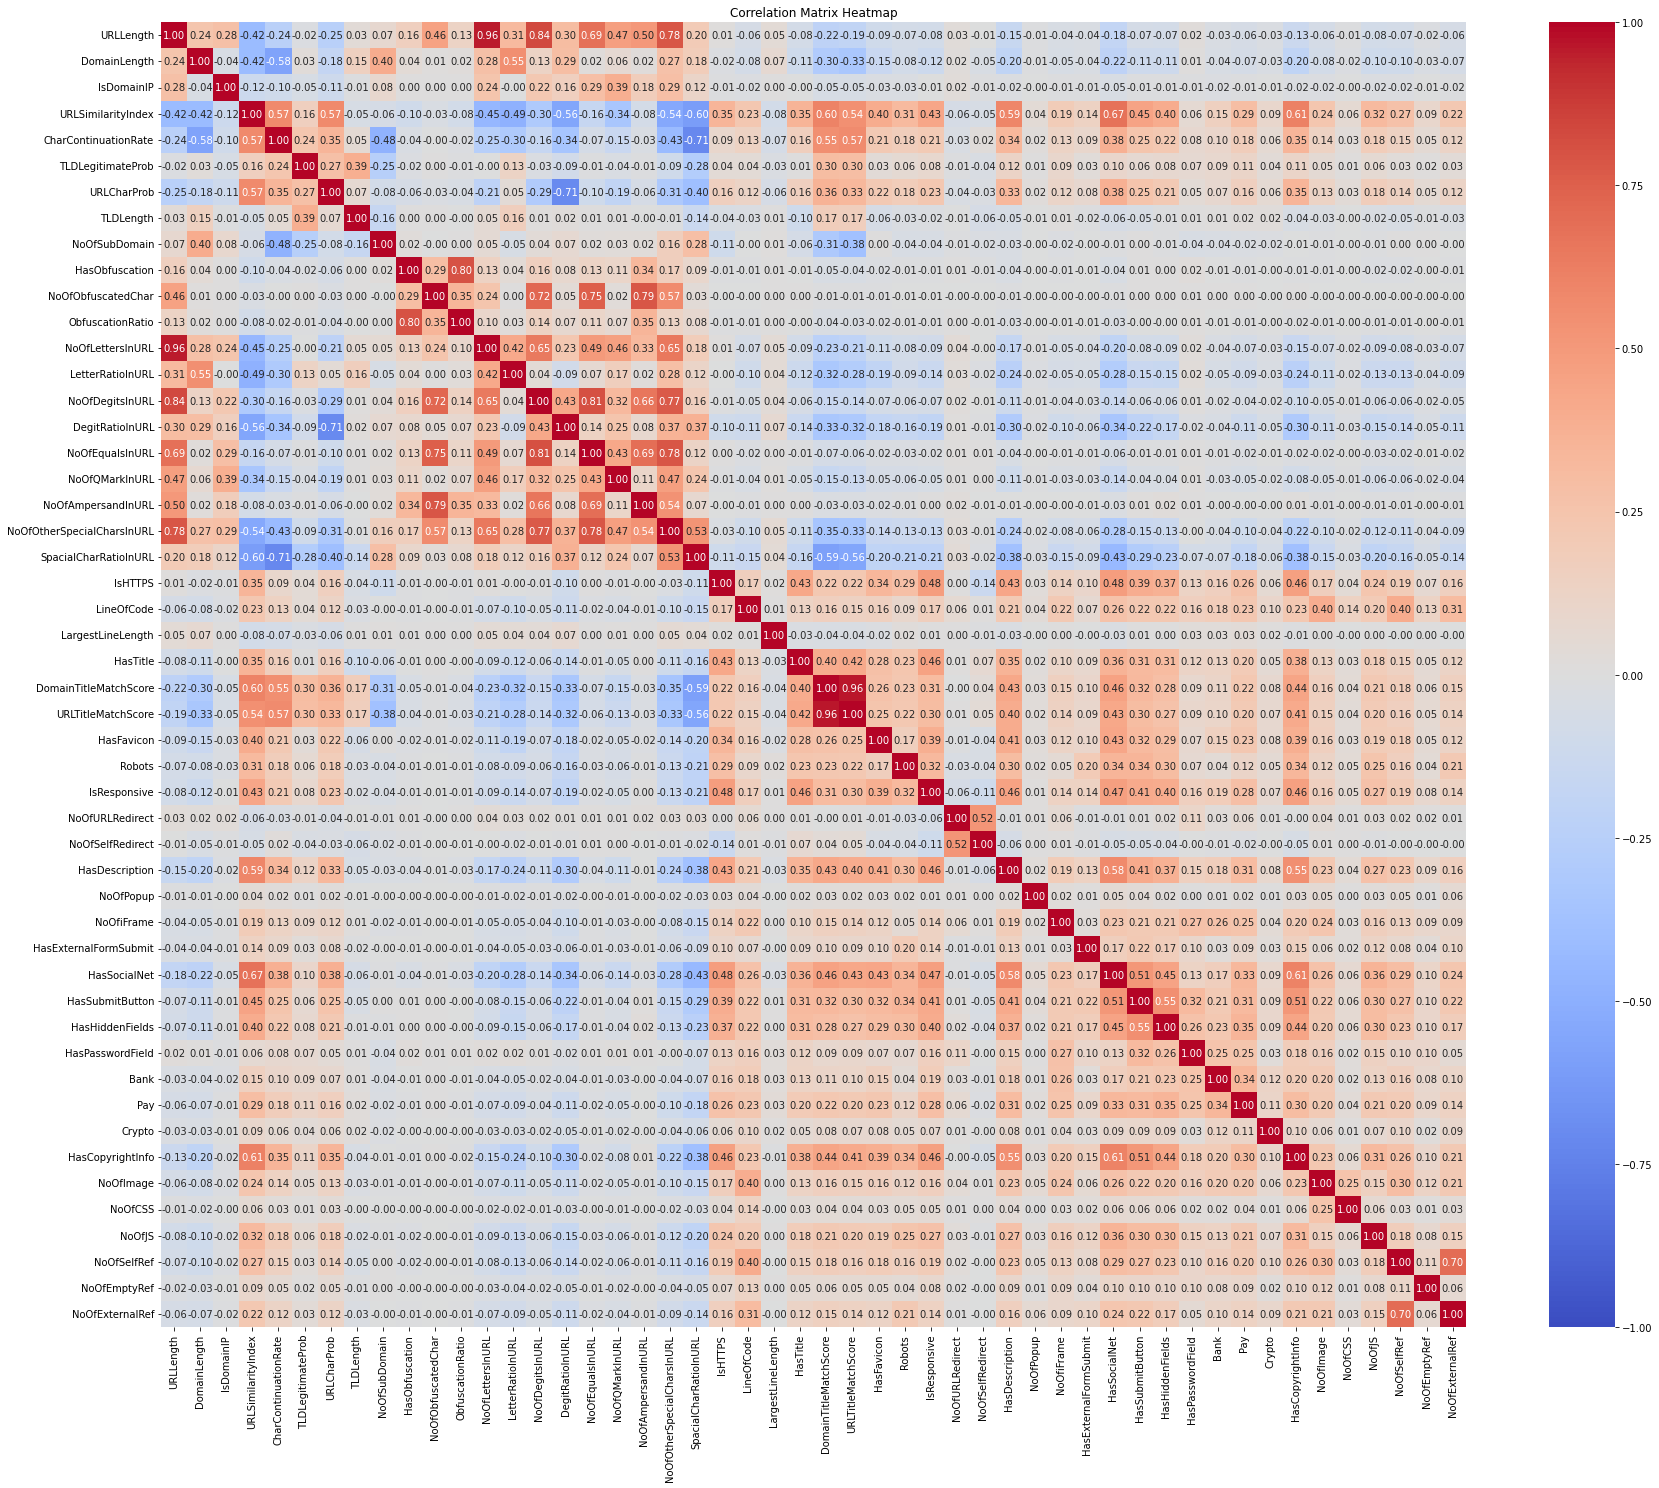

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Define threshold
threshold = 0.85

# Find pairs with high correlation
high_corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = corr_matrix.iloc[i, j]

# Print out high correlation pairs
print("Pairs with high correlation (|correlation| > {:.2f}):".format(threshold))
for pair, corr_value in high_corr_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {corr_value:.2f}")

# Visualize the correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Let's drop columns: `NoOfLettersInURL`, `DomainTitleMatchScore`...

Let's acknowledge `URL` and `Domain` as unique identifiers, so we're gonna drop those as well.

In [ ]:
columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength',
       'NoOfSubDomain', 'NoOfObfuscatedChar',
       'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'
    ]

X_new = X[columns]  # This will select only the columns listed above

X_new.head()

,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfDegitsInURL,NoOfEqualsInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,100.0,3,1,0,0,0,0,1,...,1,1,0,1,34,20,28,119,0,124
1,23,16,100.0,2,1,0,0,0,0,2,...,0,0,0,1,50,9,8,39,0,217
2,29,22,100.0,2,2,0,0,0,0,2,...,1,0,0,1,10,2,7,42,2,5
3,26,19,100.0,3,1,0,0,0,0,1,...,1,0,1,1,3,27,15,22,1,31
4,33,26,100.0,3,1,0,0,0,0,1,...,1,1,1,1,244,15,34,72,1,85


# Dimensionality Reduction

In [26]:
y.shape

(235795, 1)

In [27]:
X_new.shape

(235795, 34)

In [28]:
# proportion of target

proportions = y.value_counts(normalize=True)

# Display the proportions
print("Proportion of each class in y:")
print(proportions)

Proportion of each class in y:
label
1        0.571895
0        0.428105
Name: proportion, dtype: float64


In [29]:
data_new = pd.concat([y, X_new], axis=1)
data_new.head()

,label,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfDegitsInURL,NoOfEqualsInURL,NoOfAmpersandInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,1,31,24,100.0,3,1,0,0,0,0,...,1,1,0,1,34,20,28,119,0,124
1,1,23,16,100.0,2,1,0,0,0,0,...,0,0,0,1,50,9,8,39,0,217
2,1,29,22,100.0,2,2,0,0,0,0,...,1,0,0,1,10,2,7,42,2,5
3,1,26,19,100.0,3,1,0,0,0,0,...,1,0,1,1,3,27,15,22,1,31
4,1,33,26,100.0,3,1,0,0,0,0,...,1,1,1,1,244,15,34,72,1,85


In [30]:
data_sample = data_new.sample(n=5000, random_state=42)

y_new = data_sample.iloc[:, 0]     # Labels (First column)
X_new = data_sample.iloc[:, 1:]

print(y_new.value_counts(normalize=True)) # similar proportion! yay!

label
1    0.5682
0    0.4318
Name: proportion, dtype: float64


### PCA
- decent... but there's a lot of overlap at the zero points of the first and second dimension.

In [ ]:
# okay let's hope this pca runs!!!
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder


# If the labels are categorical, we need to convert them to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_new)

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_new)


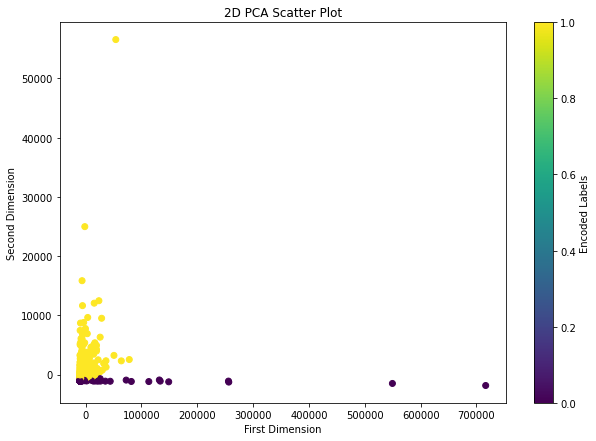

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly sample data from the PCA results
np.random.seed(42)
X_sample_pca = np.random.choice(len(pca_result), size=1000, replace=False)
pca_sample_result = pca_result[X_sample_pca]
y_sample_pca = y_new.iloc[X_sample_pca]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_pca = plt.scatter(
    pca_sample_result[:, 0],  # First Dimension
    pca_sample_result[:, 1],  # Second Dimension
    c=y_sample_pca,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D PCA Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_pca)
cbar.set_label('Encoded Labels')

plt.show()


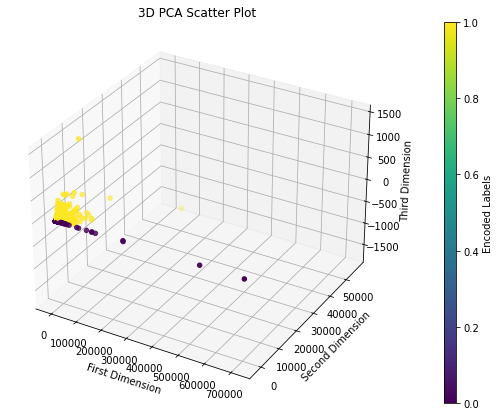

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Randomly sample data from the MDS results
np.random.seed(42)
X_sample_pca = np.random.choice(len(pca_result), size=1000, replace=False)
pca_sample_result = pca_result[X_sample_pca]
y_sample_pca = y_new.iloc[X_sample_pca]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_pca = ax.scatter(
    pca_sample_result[:, 0],  # First MDS Dimension
    pca_sample_result[:, 1],  # Second MDS Dimension
    pca_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_pca,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D PCA Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_pca, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

### MDS
- bad

In [36]:
# Perform MDS to reduce to 2 components
mds = MDS(n_components=3, random_state=42)
mds_result = mds.fit_transform(X_new)

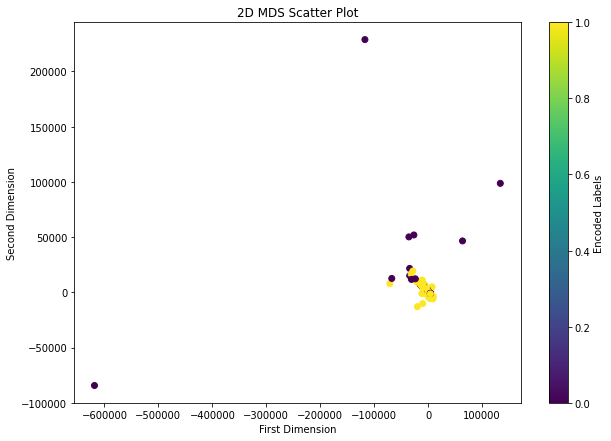

In [92]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_mds = np.random.choice(len(mds_result), size=1000, replace=False)
mds_sample_result = mds_result[X_sample_mds]
y_sample_mds = y_new.iloc[X_sample_mds]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_mds = plt.scatter(
    mds_sample_result[:, 0],  # First Dimension
    mds_sample_result[:, 1],  # Second Dimension
    c=y_sample_mds,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D MDS Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_mds)
cbar.set_label('Encoded Labels')

plt.show()


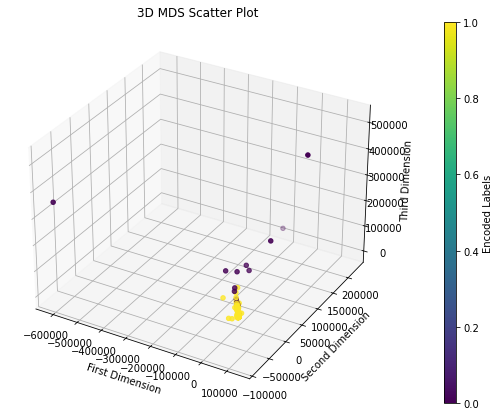

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Randomly sample data from the MDS results
np.random.seed(42)
X_sample_mds = np.random.choice(len(mds_result), size=1000, replace=False)
mds_sample_result = mds_result[X_sample_mds]
y_sample_mds = y_new.iloc[X_sample_mds]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# # Rotate the 3D plot by adjusting the viewing angle
# ax.view_init(elev=30, azim=45)  # Example: Elevation = 30 degrees, Azimuth = 45 degrees

# Plot the data points in 3D
scatter_mds = ax.scatter(
    mds_sample_result[:, 0],  # First MDS Dimension
    mds_sample_result[:, 1],  # Second MDS Dimension
    mds_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_mds,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D MDS Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_mds, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()


### PCA
PCA separated phishing from nonphishing emails into two orthogonal vectors.

### MDS
MDS failed to separate any significant clusters.

# Nonlinear Dimensionality Reduction Techniques

### Isomap
- not great either

In [51]:
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE

isomap_result = Isomap(n_neighbors=10,n_components=3).fit_transform(X_new)

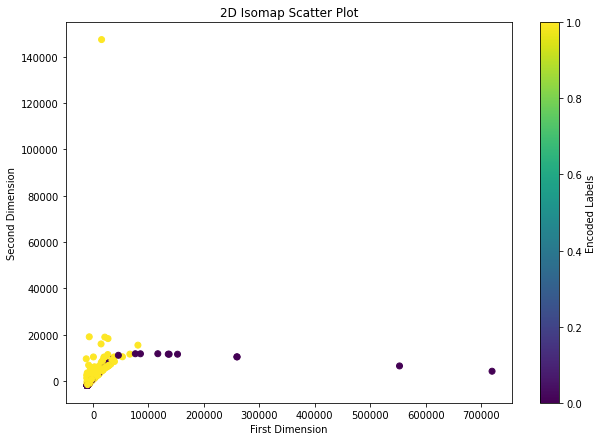

In [94]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_isomap = np.random.choice(len(isomap_result), size=1000, replace=False)
isomap_sample_result = isomap_result[X_sample_isomap]
y_sample_isomap = y_new.iloc[X_sample_isomap]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_isomap = plt.scatter(
    isomap_sample_result[:, 0],  # First Dimension
    isomap_sample_result[:, 1],  # Second Dimension
    c=y_sample_isomap,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D Isomap Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_isomap)
cbar.set_label('Encoded Labels')

plt.show()

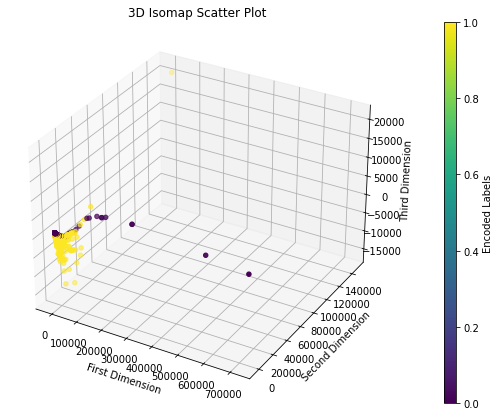

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X_sample_isomap = np.random.choice(len(isomap_result), size=1000, replace=False)
isomap_sample_result = isomap_result[X_sample_isomap]
y_sample_isomap = y_new.iloc[X_sample_isomap]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_isomap = ax.scatter(
    isomap_sample_result[:, 0],  # First MDS Dimension
    isomap_sample_result[:, 1],  # Second MDS Dimension
    isomap_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_isomap,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D Isomap Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_isomap, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()


### LLE
- not great either.

In [55]:
lle_result = LocallyLinearEmbedding(n_neighbors=12, n_components=3).fit_transform(X_new)

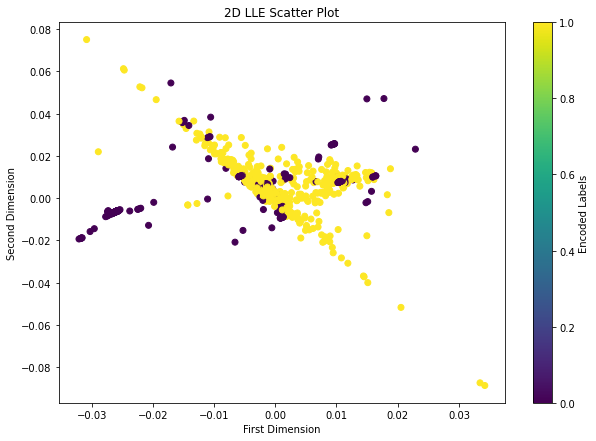

In [97]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_lle = np.random.choice(len(lle_result), size=1000, replace=False)
lle_sample_result = lle_result[X_sample_lle]
y_sample_lle = y_new.iloc[X_sample_lle]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_lle = plt.scatter(
    lle_sample_result[:, 0],  # First Dimension
    lle_sample_result[:, 1],  # Second Dimension
    c=y_sample_lle,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D LLE Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_lle)
cbar.set_label('Encoded Labels')

plt.show()

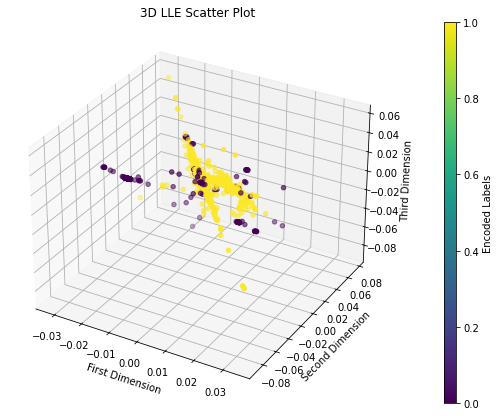

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X_sample_lle = np.random.choice(len(lle_result), size=1000, replace=False)
lle_sample_result = lle_result[X_sample_lle]
y_sample_lle = y_new.iloc[X_sample_lle]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_lle = ax.scatter(
    lle_sample_result[:, 0],  # First MDS Dimension
    lle_sample_result[:, 1],  # Second MDS Dimension
    lle_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_lle,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D LLE Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_lle, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

### t-SNE
- there's a clear separation between nonphishing and phishing data

In [86]:
tsne_result = TSNE(n_components=3, perplexity=3, random_state=42).fit_transform(X_new)

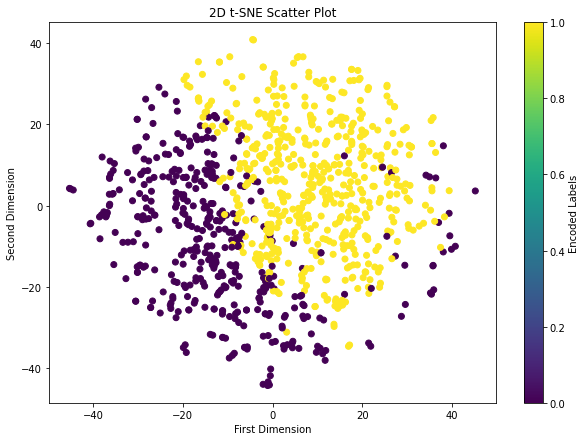

In [100]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_tsne = np.random.choice(len(tsne_result), size=1000, replace=False)
tsne_sample_result = tsne_result[X_sample_tsne]
y_sample_tsne = y_new.iloc[X_sample_tsne]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(
    tsne_sample_result[:, 0],  # First Dimension
    tsne_sample_result[:, 1],  # Second Dimension
    c=y_sample_tsne,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D t-SNE Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_tsne)
cbar.set_label('Encoded Labels')

plt.show()

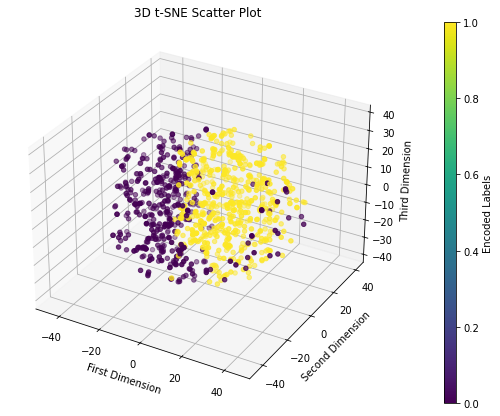

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X_sample_tsne = np.random.choice(len(tsne_result), size=1000, replace=False)
tsne_sample_result = tsne_result[X_sample_tsne]
y_sample_tsne = y_new.iloc[X_sample_tsne]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_tsne = ax.scatter(
    tsne_sample_result[:, 0],  # First MDS Dimension
    tsne_sample_result[:, 1],  # Second MDS Dimension
    tsne_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_tsne,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D t-SNE Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_tsne, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()